<a href="https://colab.research.google.com/github/Souriish9/LoanApprovalPrediction-LogisticRegression/blob/master/LoanApprovalPredictor_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('loan.csv')

In [ ]:
df=dataset.copy()

In [ ]:
df.shape

(614, 6)

In [ ]:
df.head()

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y


In [ ]:
df.isnull().sum(axis=0)

gender     13
married     3
ch         50
income      0
loanamt    22
status      0
dtype: int64

In [ ]:
cols1=['gender','married','ch']
df[cols1]=df[cols1].fillna(df.mode().iloc[0])

In [ ]:
df.dtypes

gender      object
married     object
ch         float64
income       int64
loanamt    float64
status      object
dtype: object

In [ ]:
cols2=['loanamt']
df[cols2]=df[cols2].fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
df.isnull().sum(axis=0)

gender     0
married    0
ch         0
income     0
loanamt    0
status     0
dtype: int64

In [ ]:
df

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,146.412162,Y
1,Male,Yes,1.0,4583,128.000000,N
2,Male,Yes,1.0,3000,66.000000,Y
3,Male,Yes,1.0,2583,120.000000,Y
4,Male,No,1.0,6000,141.000000,Y
...,...,...,...,...,...,...
609,Female,No,1.0,2900,71.000000,Y
610,Male,Yes,1.0,4106,40.000000,Y
611,Male,Yes,1.0,8072,253.000000,Y
612,Male,Yes,1.0,7583,187.000000,Y


In [ ]:
df

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,146.412162,Y
1,Male,Yes,1.0,4583,128.000000,N
2,Male,Yes,1.0,3000,66.000000,Y
3,Male,Yes,1.0,2583,120.000000,Y
4,Male,No,1.0,6000,141.000000,Y
...,...,...,...,...,...,...
609,Female,No,1.0,2900,71.000000,Y
610,Male,Yes,1.0,4106,40.000000,Y
611,Male,Yes,1.0,8072,253.000000,Y
612,Male,Yes,1.0,7583,187.000000,Y


<BarContainer object of 614 artists>

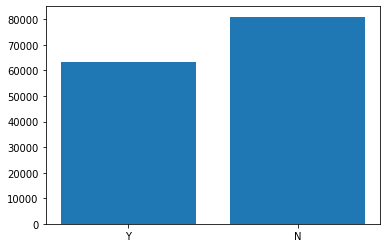

In [ ]:
plt.bar(df['status'],df['income'])

<BarContainer object of 614 artists>

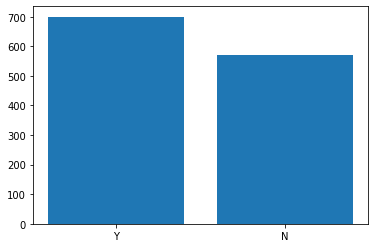

In [ ]:
plt.bar(df['status'],df['loanamt'])

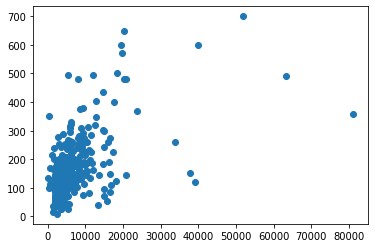

In [ ]:
plt.scatter(df['income'],df['loanamt'])

In [ ]:
df=df.drop(['gender'],axis=1)

In [ ]:
df.dtypes

married     object
ch         float64
income       int64
loanamt    float64
status      object
dtype: object

In [ ]:
df=pd.get_dummies(df,drop_first=True)
df

,ch,income,loanamt,married_Yes,status_Y
0,1.0,5849,146.412162,0,1
1,1.0,4583,128.000000,1,0
2,1.0,3000,66.000000,1,1
3,1.0,2583,120.000000,1,1
4,1.0,6000,141.000000,0,1
...,...,...,...,...,...
609,1.0,2900,71.000000,0,1
610,1.0,4106,40.000000,1,1
611,1.0,8072,253.000000,1,1
612,1.0,7583,187.000000,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [ ]:
df['income']=scalar.fit_transform(df[['income']])
df['loanamt']=scalar.fit_transform(df[['loanamt']])

In [ ]:
df

,ch,income,loanamt,married_Yes,status_Y
0,1.0,0.072991,0.000000,0,1
1,1.0,-0.134412,-0.219273,1,0
2,1.0,-0.393747,-0.957641,1,1
3,1.0,-0.462062,-0.314547,1,1
4,1.0,0.097728,-0.064454,0,1
...,...,...,...,...,...
609,1.0,-0.410130,-0.898095,0,1
610,1.0,-0.212557,-1.267279,1,1
611,1.0,0.437174,1.269371,1,1
612,1.0,0.357064,0.483367,1,1


In [ ]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)

Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 24  34]
 [  0 127]]


In [ ]:
lr.score(x_test,y_test)

0.8162162162162162